#OTRO

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lectura de datos
def leer_datos(archivo):
    return pd.read_csv(archivo)

# Normalización usando Min-Max
def normalizar_min_max(df):
    return (df - df.min()) / (df.max() - df.min())

# División de los datos
def dividir_datos(df, train_ratio=0.7):
    n = len(df)
    train_size = int(n * train_ratio)
    return df.iloc[:train_size], df.iloc[train_size:]

# Función de costo (Error Cuadrático Medio)
def costo(X, y, theta):
    m = len(y)
    predicciones = X.dot(theta)
    return ((predicciones - y) ** 2).sum() / (2 * m)

# Gradiente descendente
def gradiente_descendente(X, y, theta, alpha, num_iteraciones):
    m = len(y)
    historia_costo = []

    for _ in range(num_iteraciones):
        predicciones = X.dot(theta)
        error = predicciones - y
        gradiente = X.T.dot(error) / m
        theta = theta - alpha * gradiente
        historia_costo.append(costo(X, y, theta))

    return theta, historia_costo

# Regresión Lineal
def regresion_lineal(X, y, alpha=0.01, num_iteraciones=1000):
    X = np.column_stack((np.ones(X.shape[0]), X))
    theta = np.zeros(X.shape[1])
    theta, historia_costo = gradiente_descendente(X, y, theta, alpha, num_iteraciones)
    return theta, historia_costo

# Error Cuadrático Medio
def error_cuadratico_medio(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()


In [56]:
# Cargar datos
df = leer_datos('creditcard_2023.csv')

# Evaluación de los datos
print("Información del dataset:")
print(df.info())
print("\nResumen estadístico:")
print(df.describe())

# Verificar valores NaN
nan_count = df.isna().sum()
print("\nValores NaN por columna:")
print(nan_count)



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null

In [57]:
# Normalización
columnas_numericas = df.select_dtypes(include=[np.number]).columns
df_normalizado = df.copy()
df_normalizado[columnas_numericas] = normalizar_min_max(df[columnas_numericas])

print(df_normalizado)

              id        V1        V2        V3        V4        V5        V6  \
0       0.000000  0.565091  0.911068  0.328143  0.597037  0.191428  0.462018   
1       0.000002  0.782703  0.913159  0.216170  0.554606  0.194228  0.455582   
2       0.000004  0.565157  0.902238  0.283790  0.551131  0.190372  0.476540   
3       0.000005  0.584043  0.910345  0.284848  0.473588  0.193703  0.470699   
4       0.000007  0.574494  0.916671  0.272150  0.552320  0.190981  0.457739   
...          ...       ...       ...       ...       ...       ...       ...   
568625  0.999993  0.465034  0.920852  0.131948  0.718217  0.169934  0.456700   
568626  0.999995  0.493503  0.915978  0.179994  0.574517  0.186428  0.451533   
568627  0.999996  0.556121  0.919638  0.191875  0.602904  0.188163  0.449078   
568628  0.999998  0.721873  0.910197  0.166548  0.589585  0.191454  0.440296   
568629  1.000000  0.471723  0.927687  0.146429  0.653270  0.184315  0.433753   

              V7        V8        V9  .

In [58]:
# División inicial de los datos (70% entrenamiento, 30% prueba)
train_data, test_data = dividir_datos(df_normalizado, 0.7)

# Preparación de los datos para la regresión
X = train_data.drop(['id', 'Class', 'Amount'], axis=1)
y = train_data['Amount']


In [59]:
# Experimento 1: 70% - 30%
X_train_1, X_val_1 = dividir_datos(X, 0.7)
y_train_1, y_val_1 = dividir_datos(y, 0.7)

theta_1, historia_costo_1 = regresion_lineal(X_train_1, y_train_1)
y_pred_1 = np.column_stack((np.ones(X_val_1.shape[0]), X_val_1)).dot(theta_1)
ecm_1 = error_cuadratico_medio(y_val_1, y_pred_1)

print("\nExperimento 1 (70% - 30%):")
print(f"Error Cuadrático Medio: {ecm_1}")

# Experimento 2: 60% - 40%
X_train_2, X_val_2 = dividir_datos(X, 0.6)
y_train_2, y_val_2 = dividir_datos(y, 0.6)

theta_2, historia_costo_2 = regresion_lineal(X_train_2, y_train_2)
y_pred_2 = np.column_stack((np.ones(X_val_2.shape[0]), X_val_2)).dot(theta_2)
ecm_2 = error_cuadratico_medio(y_val_2, y_pred_2)

print("\nExperimento 2 (60% - 40%):")
print(f"Error Cuadrático Medio: {ecm_2}")

# Experimento 3: 80% - 20%
X_train_3, X_val_3 = dividir_datos(X, 0.8)
y_train_3, y_val_3 = dividir_datos(y, 0.8)

theta_3, historia_costo_3 = regresion_lineal(X_train_3, y_train_3)
y_pred_3 = np.column_stack((np.ones(X_val_3.shape[0]), X_val_3)).dot(theta_3)
ecm_3 = error_cuadratico_medio(y_val_3, y_pred_3)

print("\nExperimento 3 (80% - 20%):")
print(f"Error Cuadrático Medio: {ecm_3}")


Experimento 1 (70% - 30%):
Error Cuadrático Medio: 0.08305883795249622

Experimento 2 (60% - 40%):
Error Cuadrático Medio: 0.08303123921136138

Experimento 3 (80% - 20%):
Error Cuadrático Medio: 0.08296329479402098


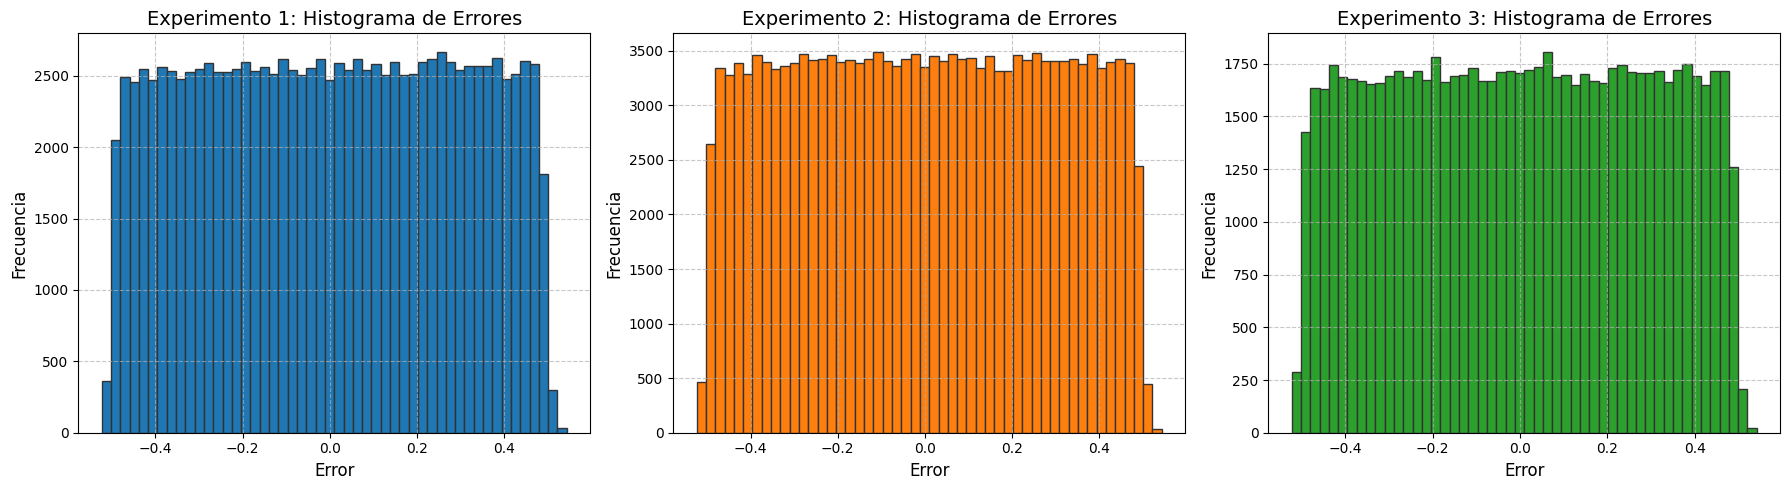

In [66]:
# Colores y estilo
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Colores para cada experimento
edge_color = '#333333'  # Color de borde de las barras

# Gráficas (histogramas) con mejoras visuales
plt.figure(figsize=(18, 5))

# Histograma del experimento 1
plt.subplot(131)
plt.hist(y_val_1 - y_pred_1, bins=50, color=colors[0], edgecolor=edge_color)
plt.title('Experimento 1: Histograma de Errores', fontsize=14)
plt.xlabel('Error', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Añadir líneas de separación

# Histograma del experimento 2
plt.subplot(132)
plt.hist(y_val_2 - y_pred_2, bins=50, color=colors[1], edgecolor=edge_color)
plt.title('Experimento 2: Histograma de Errores', fontsize=14)
plt.xlabel('Error', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Histograma del experimento 3
plt.subplot(133)
plt.hist(y_val_3 - y_pred_3, bins=50, color=colors[2], edgecolor=edge_color)
plt.title('Experimento 3: Histograma de Errores', fontsize=14)
plt.xlabel('Error', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustes para la visualización
plt.tight_layout()
plt.show()


Mejor modelo:
Modelo: Experimento 3 (80% - 20%)
Error Cuadrático Medio (MSE) en validación: 0.08296329479402098

Evaluación del mejor modelo en datos de prueba:
Error Cuadrático Medio (MSE) en prueba: 0.0831314825605761


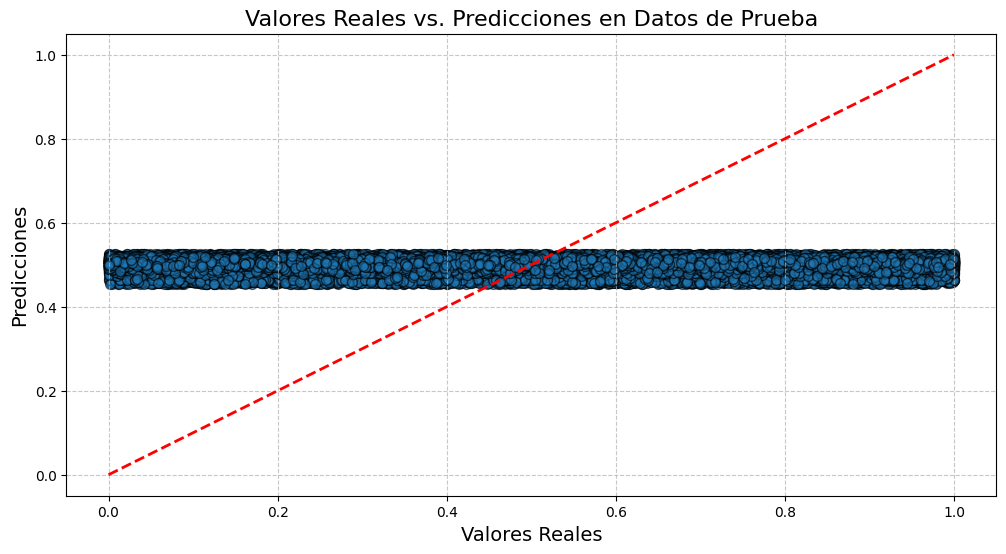

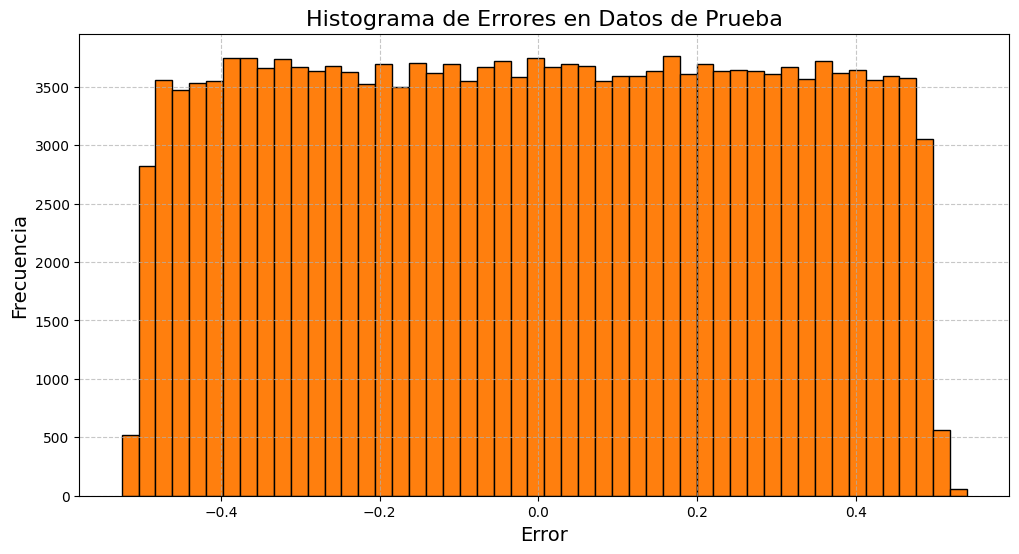

In [68]:

# Evaluación del mejor modelo en los datos de prueba
modelos = [
    ("Experimento 1 (70% - 30%)", ecm_1, theta_1),
    ("Experimento 2 (60% - 40%)", ecm_2, theta_2),
    ("Experimento 3 (80% - 20%)", ecm_3, theta_3)
]

mejor_modelo = min(modelos, key=lambda x: x[1])
nombre_mejor_modelo, mejor_ecm, mejor_theta = mejor_modelo

print("\nMejor modelo:")
print(f"Modelo: {nombre_mejor_modelo}")
print(f"Error Cuadrático Medio (MSE) en validación: {mejor_ecm}")

X_test = test_data.drop(['id', 'Class', 'Amount'], axis=1)
y_test = test_data['Amount']

y_pred_test = np.column_stack((np.ones(X_test.shape[0]), X_test)).dot(mejor_theta)
ecm_test = error_cuadratico_medio(y_test, y_pred_test)

print("\nEvaluación del mejor modelo en datos de prueba:")
print(f"Error Cuadrático Medio (MSE) en prueba: {ecm_test}")


# Gráfico de dispersión: Valores reales vs. Predicciones
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='#1f77b4', edgecolor='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales', fontsize=14)
plt.ylabel('Predicciones', fontsize=14)
plt.title('Valores Reales vs. Predicciones en Datos de Prueba', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Histograma de errores en datos de prueba
plt.figure(figsize=(12, 6))
plt.hist(y_test - y_pred_test, bins=50, color='#ff7f0e', edgecolor='k')
plt.title('Histograma de Errores en Datos de Prueba', fontsize=16)
plt.xlabel('Error', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()